##  Fourier Analysis

Learning outcome
- student understand the fourier analysis methods



Numpy has a function `numpy.fft.fft()` that computes the fourier transformation given a signal. In the examples below the signal is a vector `x` and the fourier transformation is a vector `y`. Several signals `x` are generated to demonstrate the working of the function


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def show(ori_func, ft, sampling_period = 5):
    n = len(ori_func)
    interval = sampling_period / n
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(0, sampling_period, interval), ori_func, 'black')
    plt.xlabel("Time"), plt.ylabel("Amplitude")
    plt.subplot(2,1,2)
    frequency = np.arange(n /2) / (n * interval)
    nfft = abs(ft[range(int(n / 2))] / n )
    plt.plot(frequency, nfft, 'red')
    plt.xlabel('Freq (Hz)'), plt.ylabel('Amp. Spectrum')
    plt.show()

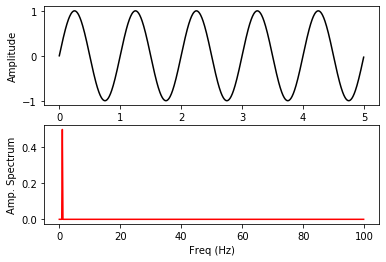

In [2]:
time = np.arange(0,5, .005)
x = np.sin(2 * np.pi * 1 * time)
y = np.fft.fft(x)
show(x, y)

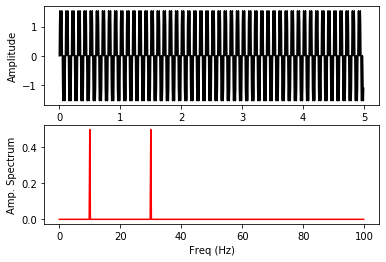

In [3]:
x2 = np.sin(2 * np.pi * 10 * time)
x3 = np.sin(2 * np.pi * 30 * time)
x = x2 + x3
y = np.fft.fft(x)
show(x, y)

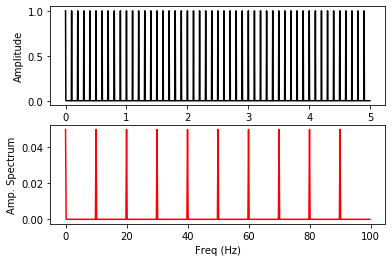

In [4]:
x = np.zeros(len(time))
x[::20] = 1
y = np.fft.fft(x)
show(x, y)

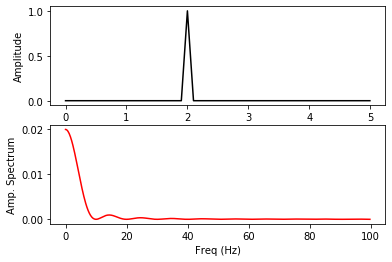

In [5]:
x = np.zeros(len(time))
x[380:400] = np.arange(0, 1, .05)
x[400:420] = np.arange(1, 0, -.05)
y = np.fft.fft(x)
show(x, y)

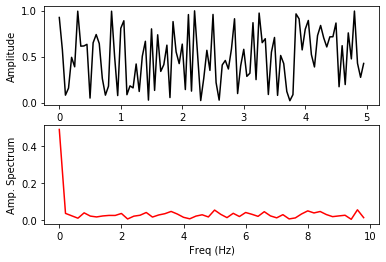

In [6]:
x = np.random.random(100)
y = np.fft.fft(x)
show(x, y)

Basically the `numpy.fft.fft()` function computes the aproximately the `DFT`. Whereas the `numpy.fft.ifft()` computes the inverse `iDFT`. We can verify this with `np.allclose()` which should return 'True' in case of similar outcome

In [7]:
x = np.random.random(500)
n = len(x)
m = np.arange(n)
k = m.reshape(n, 1)
M = np.exp(-2j * np.pi * k * m / n)
y = np.dot(M, x)

np.allclose(y, np.fft.fft(x))

True

## Assignment 1

Compute the inverse fast fourier transformation manually and compare the outcome to the `numpy.fft.ifft()` function

## Application of multiple array fourier transformation: The MRI

There are many more functions in np.fft we can use for signal analysis. For instance the multi-dimensional signals. So far we used an array of values but in case of a matrix or an image we have to use more dimensions. We can use the `np.fft.fft2()` function for 2 dimensional arrays and `np.fft.fftn()` function for mutiple dimension arrays. An apllication for instance is an image. First we have to convert an RGB image to a gray_scale. Then we can conduct the fourier transformation to show the spectrum. But in the MRI this principle is the other way around. We use a spectrum signal to convert it to an image. 

In [8]:
#help(np.fft)

Consider the shift routine `np.fft.fftshift`. With a shift routine we shift the zero-frequency component to the center of the spectrum. The inverse function is the ifftshift

In [9]:
#help(np.fft.fftshift)

[Magnetic Resonance Imaging](https://nl.wikipedia.org/wiki/Magnetic_resonance_imaging) images are acquired in a format that closely corresponds with the Fourier transform of an image. That is, the receiving antenna in an MRI-scanner picks up radiowave-frequencies and -phases that correspond with the intensity of an image at different positions. It is beyond the scope of this notebook to explain this more fully, but look up the concept of [$k$-space](http://mriquestions.com/what-is-k-space.html) in the context of MRI to learn more.

Below, the acquired $k$-space data of an MRI image is loaded in the form of a pair of 2D `numpy` arrays that represent the real and imaginary parts of the image spectra.

In [10]:
import numpy as np

kspace = np.load('../data/kspace.npz')
print('re: ', type(kspace['re']), kspace['re'].shape, kspace['re'].dtype)
print('im: ', type(kspace['im']), kspace['im'].shape, kspace['im'].dtype)

re:  <class 'numpy.ndarray'> (512, 512) float64
im:  <class 'numpy.ndarray'> (512, 512) float64


In [11]:
kspace['re']

array([[-0.99215686,  0.04957445,  0.88303446, ..., -0.44368313,
         0.88303446,  0.04957445],
       [ 0.13270908,  0.24201735, -0.07794819, ..., -0.66373464,
         0.04266843,  0.00425161],
       [ 0.38013345,  0.0403235 , -0.14267074, ...,  0.03668865,
         0.30367245, -0.57581188],
       ...,
       [ 0.33919791,  0.21967396, -0.42844451, ...,  1.28038615,
        -0.14720667, -0.63709997],
       [ 0.38013345, -0.57581188,  0.30367245, ...,  0.02099133,
        -0.14267074,  0.0403235 ],
       [ 0.13270908,  0.00425161,  0.04266843, ..., -0.75551549,
        -0.07794819,  0.24201735]])

In [12]:
kspace['im']

array([[ 0.        , -0.41785868, -0.20615857, ..., -0.40549363,
         0.20615857,  0.41785868],
       [-0.34859482,  0.19770875,  0.74854664, ..., -0.48461864,
         0.48423564, -0.21954606],
       [-0.48915756,  0.38681188,  0.75241473, ..., -0.10660202,
         0.56617848, -0.34773238],
       ...,
       [-0.345523  , -0.82386299,  0.3917584 , ..., -0.58099011,
        -0.07063717,  1.14650936],
       [ 0.48915756,  0.34773238, -0.56617848, ...,  0.91394973,
        -0.75241473, -0.38681188],
       [ 0.34859482,  0.21954606, -0.48423564, ...,  0.87662309,
        -0.74854664, -0.19770875]])

In [13]:
1j * kspace['im']

array([[ 0.+0.j        , -0.-0.41785868j, -0.-0.20615857j, ...,
        -0.-0.40549363j,  0.+0.20615857j,  0.+0.41785868j],
       [-0.-0.34859482j,  0.+0.19770875j,  0.+0.74854664j, ...,
        -0.-0.48461864j,  0.+0.48423564j, -0.-0.21954606j],
       [-0.-0.48915756j,  0.+0.38681188j,  0.+0.75241473j, ...,
        -0.-0.10660202j,  0.+0.56617848j, -0.-0.34773238j],
       ...,
       [-0.-0.345523j  , -0.-0.82386299j,  0.+0.3917584j , ...,
        -0.-0.58099011j, -0.-0.07063717j,  0.+1.14650936j],
       [ 0.+0.48915756j,  0.+0.34773238j, -0.-0.56617848j, ...,
         0.+0.91394973j, -0.-0.75241473j, -0.-0.38681188j],
       [ 0.+0.34859482j,  0.+0.21954606j, -0.-0.48423564j, ...,
         0.+0.87662309j, -0.-0.74854664j, -0.-0.19770875j]])

Based on the above we can plot the real `kspace['re']` and imaginary spectra `kspace['im']`. We use a logarithmic scale to account for the large differences in order of magnitudes. `plt.imshow(np.log10(np.abs(kspace['re'])))`

<IPython.core.display.Javascript object>


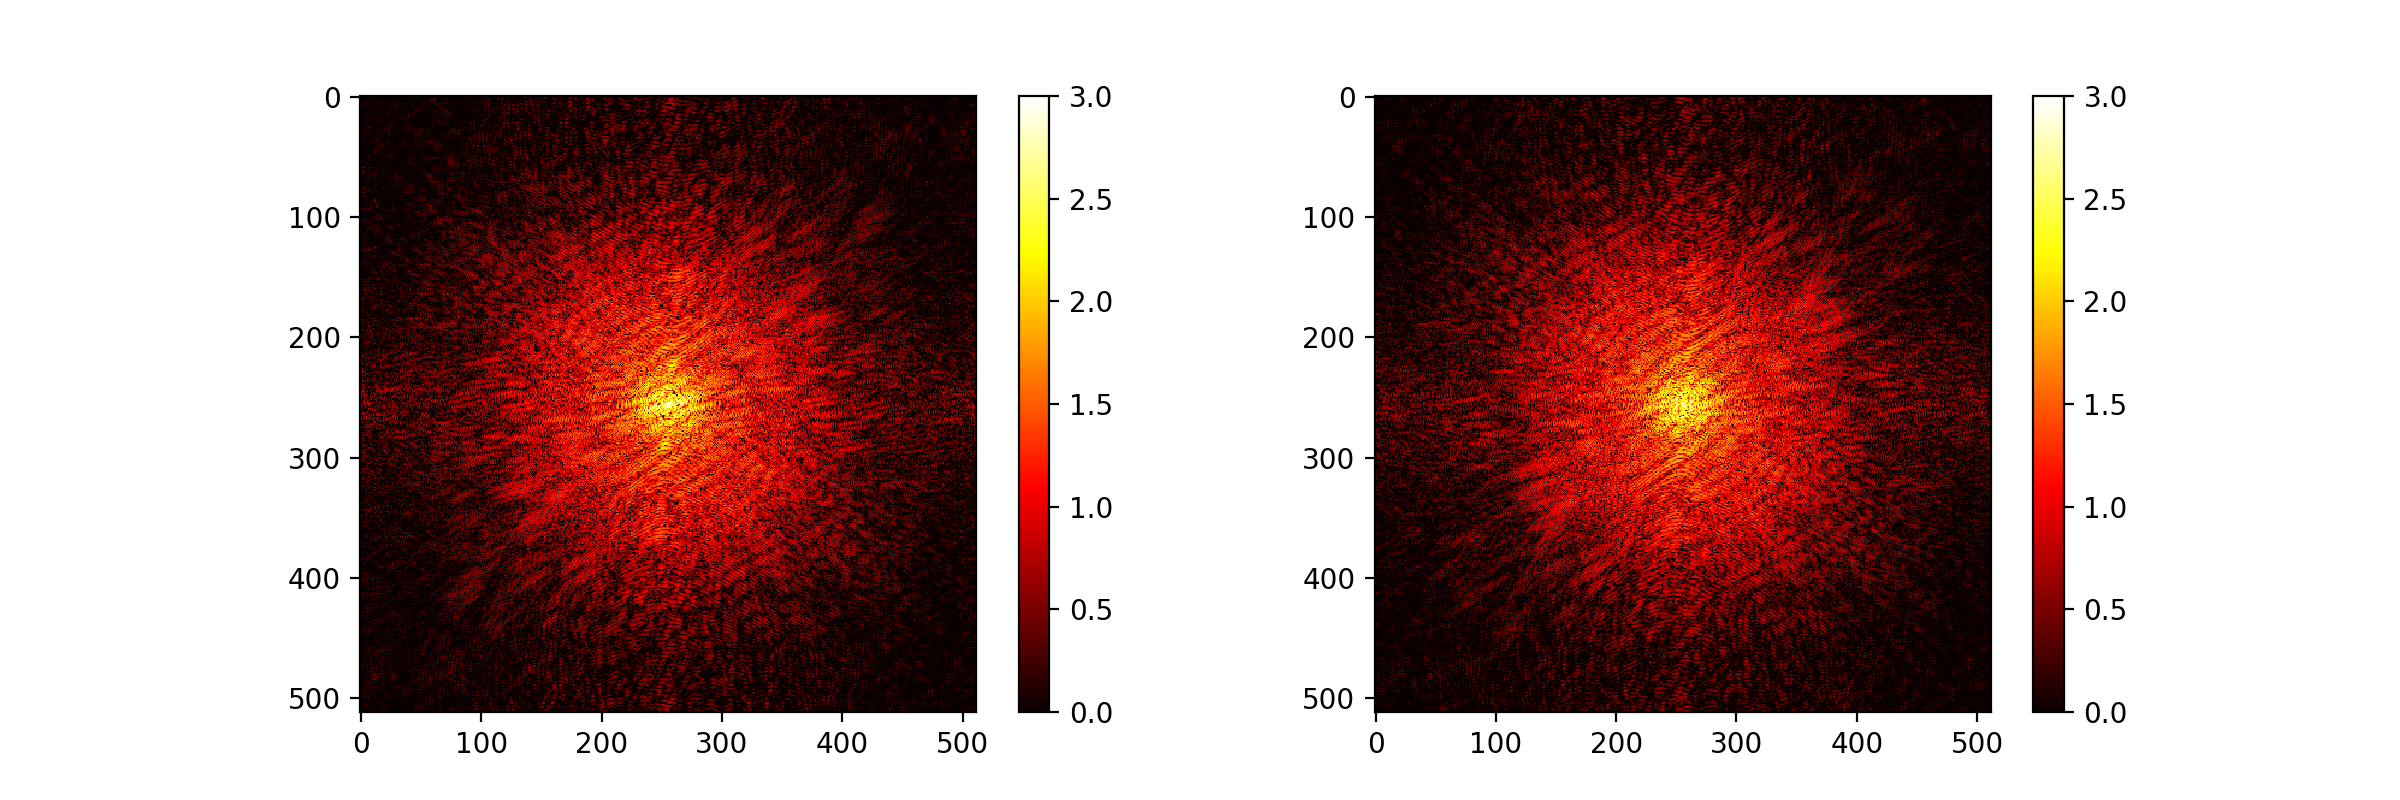

<ipython-input-18-e64cbf3d69fa>:6: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(kspace['im'])), vmin=0.0, vmax=3.0, cmap = plt.cm.hot)


In [18]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.imshow(np.log10(np.abs(kspace['re'])), vmin=0.0, vmax=3.0, cmap = plt.cm.hot)
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(np.log10(np.abs(kspace['im'])), vmin=0.0, vmax=3.0, cmap = plt.cm.hot)
plt.colorbar()
plt.show()


To transform the spectrum signal to an image we have to combine these real and imaginary spectra into a single complex signal and transform this back into image space using the Fourier transformation method. 

## Assignment 2: can you identify the organ that has been imaged?

Your job is to write the code that combine these real and imaginary spectra into a single complex signal and transform this back into image space using the Fourier transformation method.

<IPython.core.display.Javascript object>


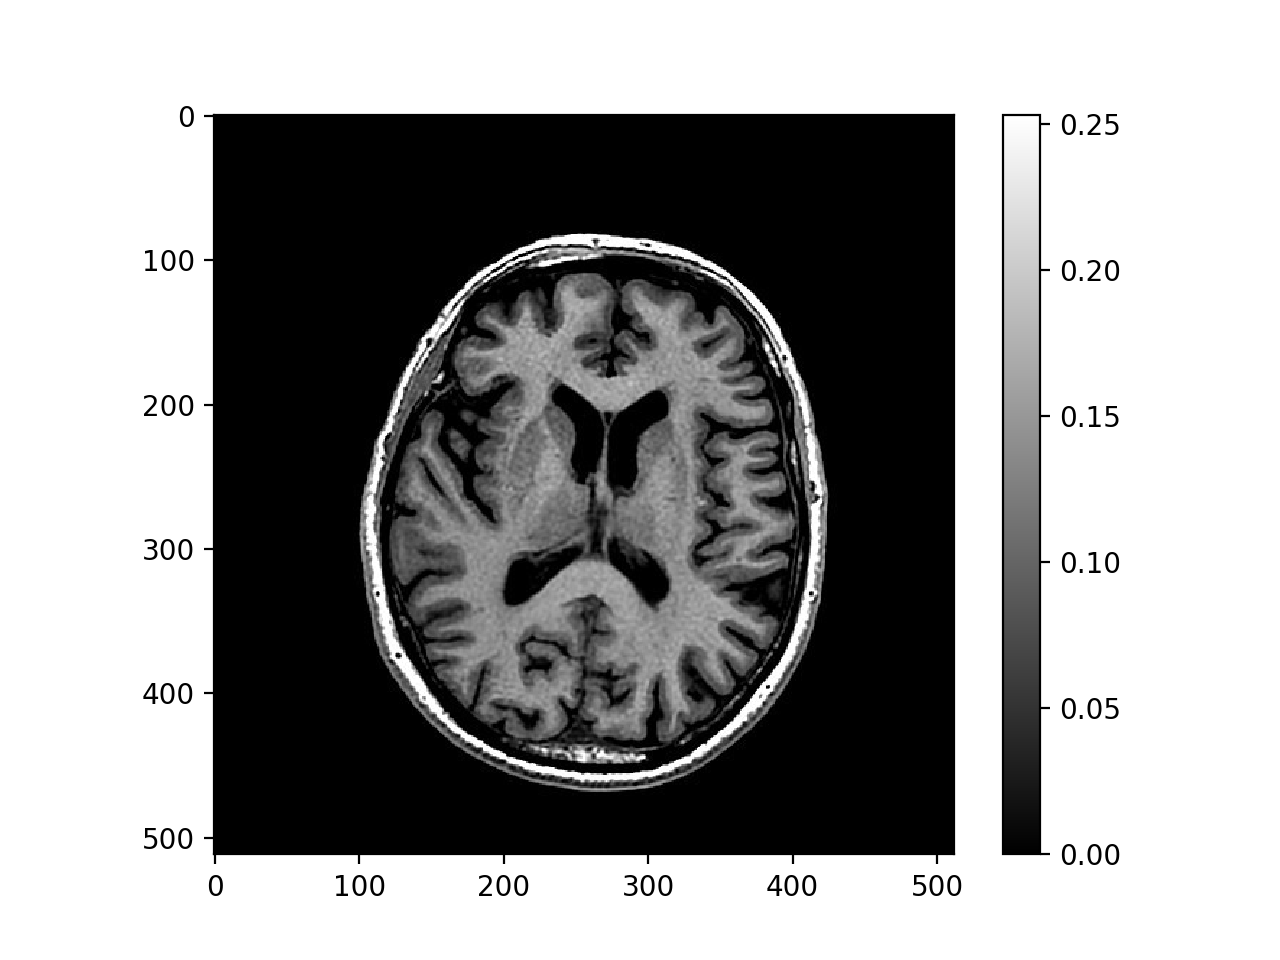

In [19]:
plt.figure()
ksp = kspace['re'] + 1j * kspace['im']
img = np.real(np.fft.ifft2(np.fft.ifftshift(ksp)))
plt.imshow(img, cmap=plt.cm.gray)
plt.colorbar()
plt.show()

Finally, investigate what happens if you crop the spectrum in $k$-space to only the central 64 $\times$ 64 pixels (use the central 64 $\times$ 64 as window) , or if you window the image in $k$-space by multiplying it with e.g. a gaussian window in both the $x$- and $y$-directions.

<IPython.core.display.Javascript object>


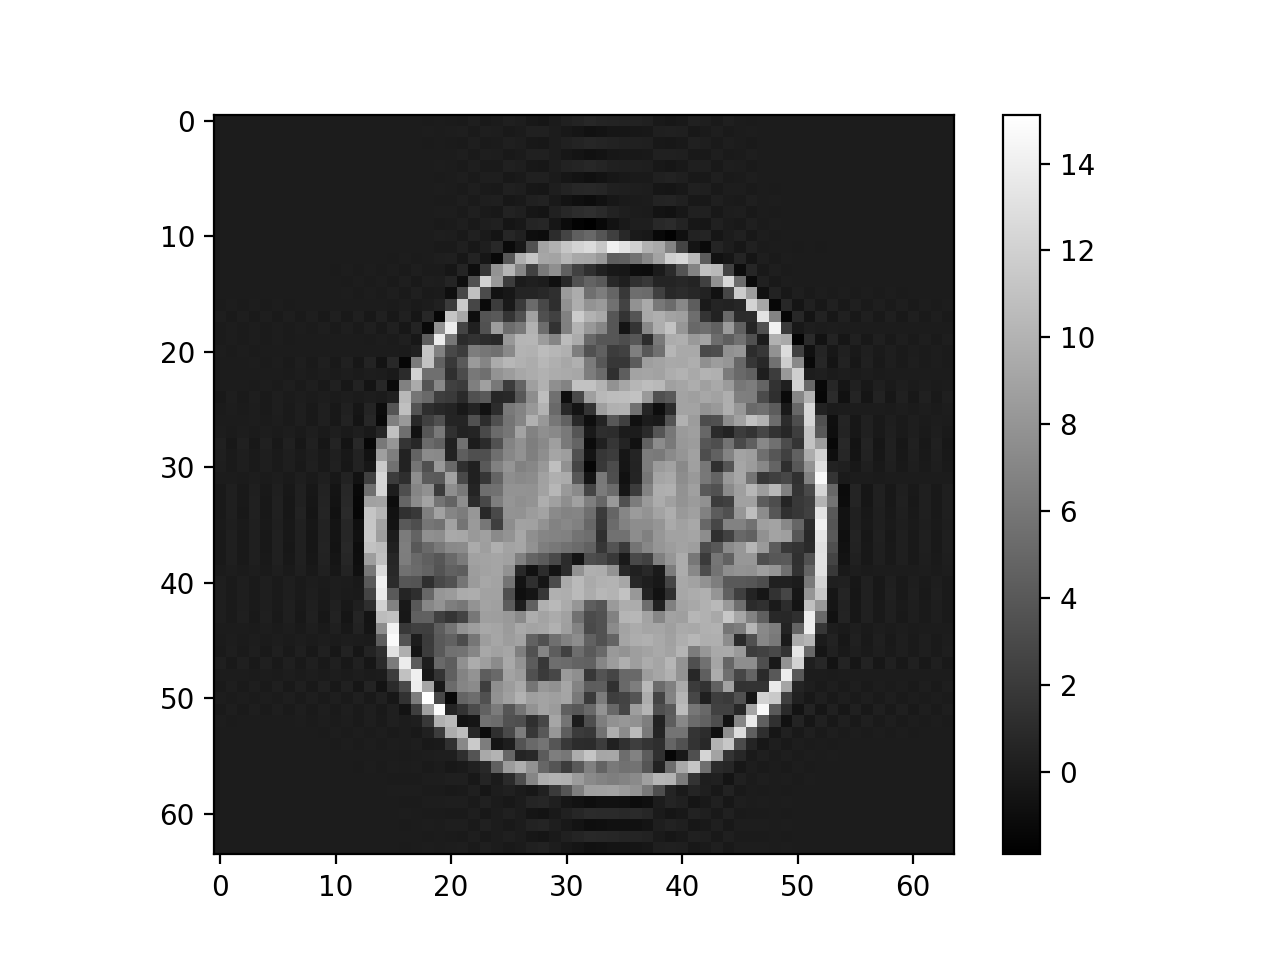

In [20]:
plt.figure()
#crop the spectrum in 𝑘 -space to only the central 64  ×  64 pixel
img = np.real(np.fft.ifft2(np.fft.ifftshift(ksp[224:288, 224:288])))
plt.imshow(img, cmap=plt.cm.gray)
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


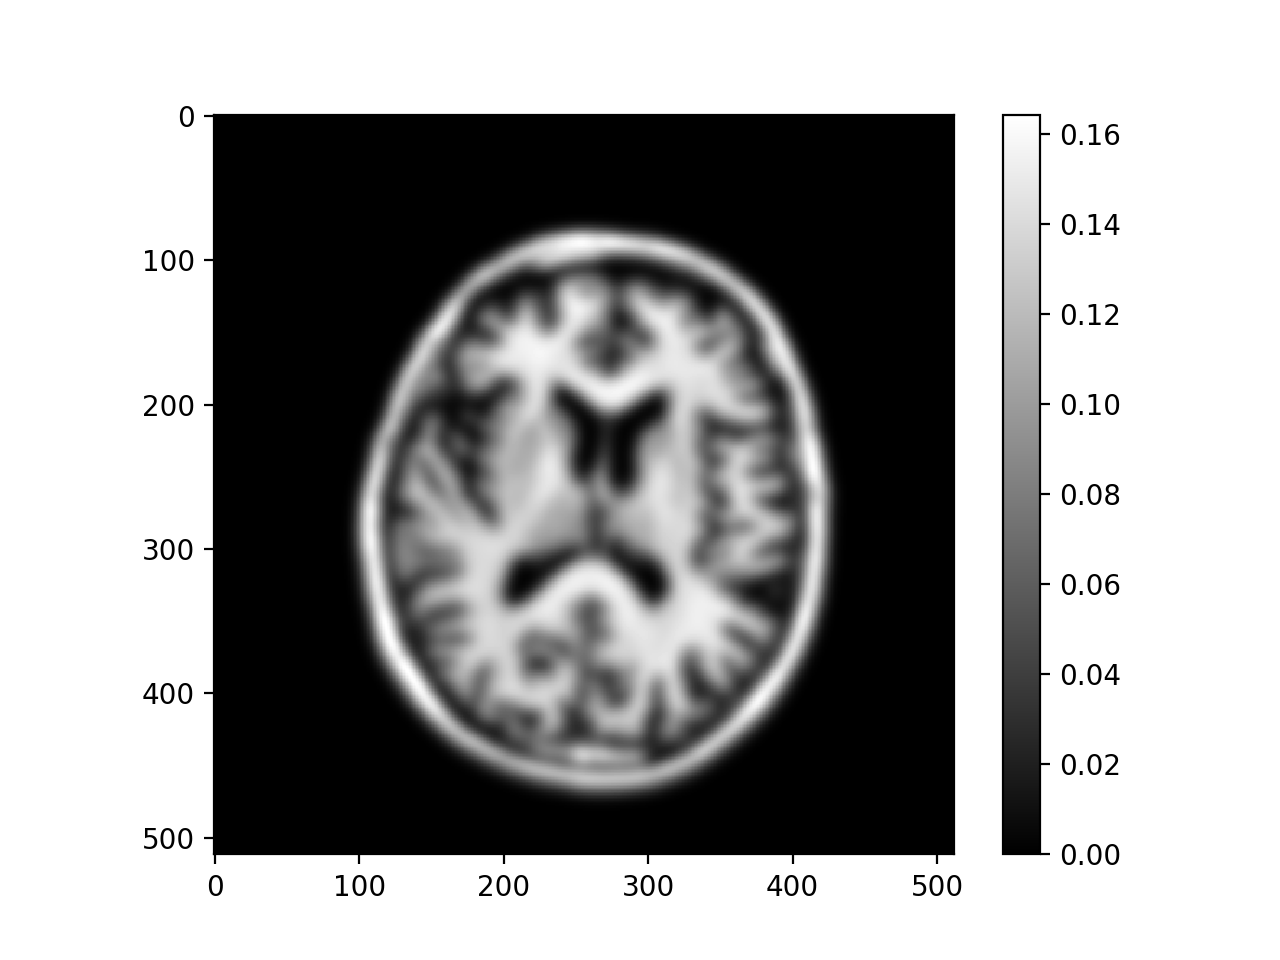

In [21]:
plt.figure()
x, y = np.meshgrid(np.arange(-256, 256), np.arange(-256, 256))
sigma = 16
gaussian = np.exp(-(x*x+y*y)/(2*sigma*sigma))
img = np.real(np.fft.ifft2(np.fft.ifftshift(ksp * gaussian)))

plt.imshow(img, cmap=plt.cm.gray)
plt.colorbar()
plt.show()

Now change the sigma a couple of times to see the effect